In [1]:
import numpy as np
import pylab as plt
import networkx as nx
import osmnx as ox

In [2]:
# how many points in graph? x points
MATRIX_SIZE = 1121

# create matrix x*y
R = np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE))
R *= -1
R

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [3]:
import matplotlib.pyplot as plt
place_name = "Hell's Kitchen, United States" #Malaysia
graph = ox.graph_from_place(place_name)

In [4]:
graph2 = ox.utils_graph.get_undirected(graph)

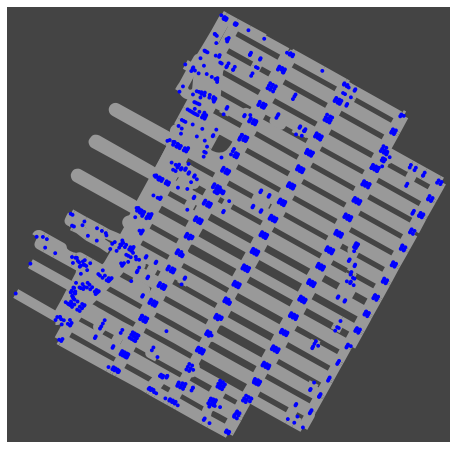

(<Figure size 576x576 with 1 Axes>, <AxesSubplot: >)

In [5]:
ox.plot.plot_graph(graph2, ax=None, figsize=(8, 8), bgcolor='#444444', node_color='b', node_size=15, node_alpha=None, node_edgecolor='none', node_zorder=1, edge_color='#999999', edge_linewidth=10, edge_alpha=None, show=True, close=False, save=False, filepath=None, dpi=300, bbox=None)

In [6]:
adjmatrix = nx.to_numpy_array(graph2)
adjmatrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
for i in range(0, len(adjmatrix)):
    for j in range(0, len(adjmatrix)):
        if adjmatrix[i][j] == 1.0:
            R[i][j] = 0
R[589, 589] = 1000

In [ ]:
# # assign zeros to paths and 100 to goal-reaching point
# for point in points_list:
#     print(point)
#     if point[1] == 314:
#         R[point] = 100
#     else:
#         R[point] = 0

#     if point[0] == 314:
#         R[point[::-1]] = 100
#     else:
#         # reverse of point
#         R[point[::-1]]= 0
# # add goal point round trip
# R[goal,goal]= 100

In [8]:
R[589, 589]

1000.0

In [9]:
# Here we initialize our Q-learning Matrix
Q = np.matrix(np.zeros([1121, 1121]))

# learning parameter
gamma = 0.8

initial_state = 1

#---------------------------------------------------------------
# Given a particular state we want to know what the available actions that we can do
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[0]
    return av_act

available_act = available_actions(initial_state) 

#---------------------------------------------------------------
# Given a range of available action we want to sample the next action that we can do
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

#---------------------------------------------------------------

def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    #print(max_index)
  
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
        
    max_value = Q[action, max_index]
  
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)
  
    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)
    
update(initial_state, action, gamma)

max_value 0.0


0

In [ ]:
# max_index = np.where(Q[1,] == np.max(Q[1,]))[1]
# max_index.shape[0]
# max_index = int(np.random.choice(max_index, size = 1))
# max_index

In [ ]:
# available_act = available_actions(1)
# available_act

In [ ]:
# int(Q.shape[0])

In [ ]:
# open_door

In [ ]:
# nodes_list[562]
# ox.plot_graph_route(graph, [8393241418])

In [ ]:
# ox.plot_graph_route(graph, [nodes_list[110]])

In [ ]:
# ox.plot_graph_route(graph, [nodes_list[314]])

In [ ]:
# Training
open_door = []
scores = []
for i in range(100000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    #print(current_state)
    available_act = available_actions(current_state)
#     print(available_act.size)
    #print("pre-loop")
    if available_act.size == 0:
        #print("The current state is: {}".format(current_state))
        open_door.append(current_state)
        #i+=1
        current_state = np.random.choice(np.setdiff1d(range(0,int(Q.shape[0])), open_door))
        print("The new chosen current state is: {}".format(current_state))
        available_act = available_actions(current_state)
        print("The available actions are: {}".format(available_act))
        
    #action = sample_next_action(available_act)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]

while current_state != 1120:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0

Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
ma

Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
ma

Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
ma

Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
ma

Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
ma

max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0

max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0

Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
ma

Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
ma

Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
S

Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
S

Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
S

Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
S

Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
Score: 324.0
max_value 0.0
S

Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
S

Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
Score: 388.0
max_value 0.0
S

Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
S

Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
S

Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
S

Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 1561.6000000000001
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0
max_value 0.0
Score: 452.0


Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 1952.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0

Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0


Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0


Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0
Score: 503.20000000000005
max_value 0.0


Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001


Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001


Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001
max_value 0.0
Score: 554.4000000000001


Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001


Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001


Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001
max_value 0.0
Score: 605.6000000000001


Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 999.4240000000002
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score: 687.52
max_value 0.0
Score:

Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_value 0.0
Score: 769.44
max_va

Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001


Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001


Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001


Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001
max_value 0.0
Score: 874.4000000000001


Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001


Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 1249.2800000000002
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925.6000000000001
max_value 0.0
Score: 925

Score: 1022.3680000000002
max_value 0.0
Score: 1022.3680000000002
max_value 0.0
Score: 1022.3680000000002
max_value 0.0
Score: 1022.3680000000002
max_value 0.0
Score: 1022.3680000000002
max_value 0.0
Score: 1022.3680000000002
max_value 0.0
Score: 1022.3680000000002
max_value 0.0
Score: 1022.3680000000002
max_value 0.0
Score: 1022.3680000000002
max_value 799.5392000000002
Score: 1055.1360000000002
max_value 0.0
Score: 1055.1360000000002
max_value 0.0
Score: 1055.1360000000002
max_value 0.0
Score: 1055.1360000000002
max_value 0.0
Score: 1055.1360000000002
max_value 0.0
Score: 1055.1360000000002
max_value 0.0
Score: 1055.1360000000002
max_value 0.0
Score: 1055.1360000000002
max_value 0.0
Score: 1055.1360000000002
max_value 0.0
Score: 1055.1360000000002
max_value 0.0
Score: 1055.1360000000002
max_value 0.0
Score: 1055.1360000000002
max_value 0.0
Score: 1055.1360000000002
max_value 0.0
Score: 1055.1360000000002
max_value 0.0
Score: 1055.1360000000002
max_value 0.0
Score: 1055.1360000000002


Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0


Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0
Score: 1129.3760000000002
max_value 0.0


Score: 1139.6160000000002
max_value 0.0
Score: 1139.6160000000002
max_value 0.0
Score: 1139.6160000000002
max_value 0.0
Score: 1139.6160000000002
max_value 0.0
Score: 1139.6160000000002
max_value 0.0
Score: 1139.6160000000002
max_value 0.0
Score: 1139.6160000000002
max_value 0.0
Score: 1139.6160000000002
max_value 0.0
Score: 1139.6160000000002
max_value 0.0
Score: 1139.6160000000002
max_value 0.0
Score: 1139.6160000000002
max_value 0.0
Score: 1139.6160000000002
max_value 0.0
Score: 1139.6160000000002
max_value 0.0
Score: 1139.6160000000002
max_value 0.0
Score: 1139.6160000000002
max_value 0.0
Score: 1139.6160000000002
max_value 0.0
Score: 1139.6160000000002
max_value 0.0
Score: 1139.6160000000002
max_value 0.0
Score: 1139.6160000000002
max_value 0.0
Score: 1139.6160000000002
max_value 0.0
Score: 1139.6160000000002
max_value 0.0
Score: 1139.6160000000002
max_value 0.0
Score: 1139.6160000000002
max_value 0.0
Score: 1139.6160000000002
max_value 0.0
Score: 1139.6160000000002
max_value 0.0


Score: 1149.8560000000002
max_value 0.0
Score: 1149.8560000000002
max_value 0.0
Score: 1149.8560000000002
max_value 0.0
Score: 1149.8560000000002
max_value 0.0
Score: 1149.8560000000002
max_value 0.0
Score: 1149.8560000000002
max_value 0.0
Score: 1149.8560000000002
max_value 0.0
Score: 1149.8560000000002
max_value 0.0
Score: 1149.8560000000002
max_value 0.0
Score: 1149.8560000000002
max_value 0.0
Score: 1149.8560000000002
max_value 0.0
Score: 1149.8560000000002
max_value 0.0
Score: 1149.8560000000002
max_value 0.0
Score: 1149.8560000000002
max_value 0.0
Score: 1149.8560000000002
max_value 0.0
Score: 1149.8560000000002
max_value 0.0
Score: 1149.8560000000002
max_value 0.0
Score: 1149.8560000000002
max_value 0.0
Score: 1149.8560000000002
max_value 0.0
Score: 1149.8560000000002
max_value 0.0
Score: 1149.8560000000002
max_value 0.0
Score: 1149.8560000000002
max_value 0.0
Score: 1149.8560000000002
max_value 639.6313600000002
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003


Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0


max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003


Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0


Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0


Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0
Score: 1176.0704000000003
max_value 0.0


Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1227.2704
max_value 0.0
Score: 1

Score: 1268.2304000000001
max_value 0.0
Score: 1268.2304000000001
max_value 0.0
Score: 1268.2304000000001
max_value 0.0
Score: 1268.2304000000001
max_value 0.0
Score: 1268.2304000000001
max_value 0.0
Score: 1268.2304000000001
max_value 0.0
Score: 1268.2304000000001
max_value 0.0
Score: 1268.2304000000001
max_value 0.0
Score: 1268.2304000000001
max_value 0.0
Score: 1268.2304000000001
max_value 0.0
Score: 1268.2304000000001
max_value 0.0
Score: 1268.2304000000001
max_value 0.0
Score: 1268.2304000000001
max_value 0.0
Score: 1268.2304000000001
max_value 0.0
Score: 1268.2304000000001
max_value 0.0
Score: 1268.2304000000001
max_value 0.0
Score: 1268.2304000000001
max_value 0.0
Score: 1268.2304000000001
max_value 0.0
Score: 1268.2304000000001
max_value 0.0
Score: 1268.2304000000001
max_value 0.0
Score: 1268.2304000000001
max_value 0.0
Score: 1268.2304000000001
max_value 0.0
Score: 1268.2304000000001
max_value 0.0
Score: 1268.2304000000001
max_value 0.0
Score: 1268.2304000000001
max_value 0.0


Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0


Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0
Score: 1327.6224000000002
max_value 0.0


Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0


Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 1249.2800000000002
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002
max_value 0.0
Score: 1368.5824000000002

Score: 1409.5424000000003
max_value 0.0
Score: 1409.5424000000003
max_value 0.0
Score: 1409.5424000000003
max_value 0.0
Score: 1409.5424000000003
max_value 0.0
Score: 1409.5424000000003
max_value 0.0
Score: 1409.5424000000003
max_value 0.0
Score: 1409.5424000000003
max_value 0.0
Score: 1409.5424000000003
max_value 0.0
Score: 1409.5424000000003
max_value 0.0
Score: 1409.5424000000003
max_value 0.0
Score: 1409.5424000000003
max_value 0.0
Score: 1409.5424000000003
max_value 0.0
Score: 1409.5424000000003
max_value 0.0
Score: 1409.5424000000003
max_value 0.0
Score: 1409.5424000000003
max_value 0.0
Score: 1409.5424000000003
max_value 0.0
Score: 1409.5424000000003
max_value 0.0
Score: 1409.5424000000003
max_value 0.0
Score: 1409.5424000000003
max_value 0.0
Score: 1409.5424000000003
max_value 0.0
Score: 1409.5424000000003
max_value 0.0
Score: 1409.5424000000003
max_value 0.0
Score: 1409.5424000000003
max_value 0.0
Score: 1409.5424000000003
max_value 0.0
Score: 1409.5424000000003
max_value 0.0


Score: 1442.3104000000003
max_value 0.0
Score: 1442.3104000000003
max_value 0.0
Score: 1442.3104000000003
max_value 0.0
Score: 1442.3104000000003
max_value 0.0
Score: 1442.3104000000003
max_value 0.0
Score: 1442.3104000000003
max_value 0.0
Score: 1442.3104000000003
max_value 0.0
Score: 1442.3104000000003
max_value 0.0
Score: 1442.3104000000003
max_value 0.0
Score: 1442.3104000000003
max_value 0.0
Score: 1442.3104000000003
max_value 0.0
Score: 1442.3104000000003
max_value 0.0
Score: 1442.3104000000003
max_value 0.0
Score: 1442.3104000000003
max_value 0.0
Score: 1442.3104000000003
max_value 0.0
Score: 1442.3104000000003
max_value 0.0
Score: 1442.3104000000003
max_value 0.0
Score: 1442.3104000000003
max_value 0.0
Score: 1442.3104000000003
max_value 0.0
Score: 1442.3104000000003
max_value 0.0
Score: 1442.3104000000003
max_value 0.0
Score: 1442.3104000000003
max_value 0.0
Score: 1442.3104000000003
max_value 0.0
Score: 1442.3104000000003
max_value 0.0
Score: 1442.3104000000003
max_value 0.0


Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0


Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 1249.2800000000002
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003
max_value 0.0
Score: 1483.2704000000003

Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0


Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0
Score: 1524.2304000000004
max_value 0.0


max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004


Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0
Score: 1575.4304000000004
max_value 0.0


Score: 1626.6304000000005
max_value 0.0
Score: 1626.6304000000005
max_value 0.0
Score: 1626.6304000000005
max_value 0.0
Score: 1626.6304000000005
max_value 0.0
Score: 1626.6304000000005
max_value 0.0
Score: 1626.6304000000005
max_value 0.0
Score: 1626.6304000000005
max_value 0.0
Score: 1626.6304000000005
max_value 0.0
Score: 1626.6304000000005
max_value 0.0
Score: 1626.6304000000005
max_value 0.0
Score: 1626.6304000000005
max_value 0.0
Score: 1626.6304000000005
max_value 0.0
Score: 1626.6304000000005
max_value 0.0
Score: 1626.6304000000005
max_value 0.0
Score: 1626.6304000000005
max_value 0.0
Score: 1626.6304000000005
max_value 0.0
Score: 1626.6304000000005
max_value 0.0
Score: 1626.6304000000005
max_value 0.0
Score: 1626.6304000000005
max_value 0.0
Score: 1626.6304000000005
max_value 0.0
Score: 1626.6304000000005
max_value 0.0
Score: 1626.6304000000005
max_value 0.0
Score: 1626.6304000000005
max_value 0.0
Score: 1626.6304000000005
max_value 0.0
Score: 1626.6304000000005
max_value 0.0


Score: 1388.9336368563686
max_value 0.0
Score: 1388.9336368563686
max_value 0.0
Score: 1388.9336368563686
max_value 0.0
Score: 1388.9336368563686
max_value 0.0
Score: 1388.9336368563686
max_value 0.0
Score: 1388.9336368563686
max_value 0.0
Score: 1388.9336368563686
max_value 0.0
Score: 1388.9336368563686
max_value 0.0
Score: 1388.9336368563686
max_value 0.0
Score: 1388.9336368563686
max_value 0.0
Score: 1388.9336368563686
max_value 0.0
Score: 1388.9336368563686
max_value 0.0
Score: 1388.9336368563686
max_value 0.0
Score: 1388.9336368563686
max_value 0.0
Score: 1388.9336368563686
max_value 0.0
Score: 1388.9336368563686
max_value 0.0
Score: 1388.9336368563686
max_value 0.0
Score: 1388.9336368563686
max_value 0.0
Score: 1388.9336368563686
max_value 0.0
Score: 1388.9336368563686
max_value 0.0
Score: 1388.9336368563686
max_value 0.0
Score: 1388.9336368563686
max_value 0.0
Score: 1388.9336368563686
max_value 0.0
Score: 1388.9336368563686
max_value 0.0
Score: 1388.9336368563686
max_value 0.0


Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924
max_value 0.0
Score: 1444.457192411924


Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0


Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 1249.2800000000002
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366

Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0


Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0


Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0


Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 0.0
Score: 1471.5418536585366
max_value 639.6313600000002
Score: 1493.2095826558266
max_value 0.0
Score: 1493.2095826558266
max_value 0.0
Score: 1493.2095826558266
max_value 0.0
Score: 1493.2095826558266
max_value 0.0
Score: 1493.2095826558266
max_value 0.0
Score: 1493.2095826558266
max_value 0.0
Score: 1493.2095826558266
max_value 0.0
Score: 1493.2095826558266
max_value 511.70508800000016
Score: 1510

Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0


Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0
Score: 1510.5437658536587
max_value 0.0


Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0


Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 0.0
Score: 1555.6206343631436
max_value 1889.28
Score: 1566.7209053658537
max_value 0.0
Score: 1566.7209053658537
max_value 

Score: 1577.8147826124662
max_value 0.0
Score: 1577.8147826124662
max_value 0.0
Score: 1577.8147826124662
max_value 0.0
Score: 1577.8147826124662
max_value 0.0
Score: 1577.8147826124662
max_value 0.0
Score: 1577.8147826124662
max_value 0.0
Score: 1577.8147826124662
max_value 0.0
Score: 1577.8147826124662
max_value 0.0
Score: 1577.8147826124662
max_value 0.0
Score: 1577.8147826124662
max_value 0.0
Score: 1577.8147826124662
max_value 0.0
Score: 1577.8147826124662
max_value 0.0
Score: 1577.8147826124662
max_value 0.0
Score: 1577.8147826124662
max_value 0.0
Score: 1577.8147826124662
max_value 0.0
Score: 1577.8147826124662
max_value 0.0
Score: 1577.8147826124662
max_value 0.0
Score: 1577.8147826124662
max_value 0.0
Score: 1577.8147826124662
max_value 0.0
Score: 1577.8147826124662
max_value 0.0
Score: 1577.8147826124662
max_value 0.0
Score: 1577.8147826124662
max_value 0.0
Score: 1577.8147826124662
max_value 0.0
Score: 1577.8147826124662
max_value 0.0
Score: 1577.8147826124662
max_value 0.0


Score: 1591.6821291707317
max_value 0.0
Score: 1591.6821291707317
max_value 0.0
Score: 1591.6821291707317
max_value 0.0
Score: 1591.6821291707317
max_value 0.0
Score: 1591.6821291707317
max_value 0.0
Score: 1591.6821291707317
max_value 0.0
Score: 1591.6821291707317
max_value 0.0
Score: 1591.6821291707317
max_value 0.0
Score: 1591.6821291707317
max_value 0.0
Score: 1591.6821291707317
max_value 0.0
Score: 1591.6821291707317
max_value 0.0
Score: 1591.6821291707317
max_value 0.0
Score: 1591.6821291707317
max_value 0.0
Score: 1591.6821291707317
max_value 0.0
Score: 1591.6821291707317
max_value 0.0
Score: 1591.6821291707317
max_value 0.0
Score: 1591.6821291707317
max_value 0.0
Score: 1591.6821291707317
max_value 0.0
Score: 1591.6821291707317
max_value 0.0
Score: 1591.6821291707317
max_value 0.0
Score: 1591.6821291707317
max_value 0.0
Score: 1591.6821291707317
max_value 0.0
Score: 1591.6821291707317
max_value 0.0
Score: 1591.6821291707317
max_value 0.0
Score: 1591.6821291707317
max_value 639.

Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 1561.6000000000001
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 164

Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634
max_value 0.0
Score: 1644.419108214634


Score: 1658.2864547728996
max_value 0.0
Score: 1658.2864547728996
max_value 0.0
Score: 1658.2864547728996
max_value 0.0
Score: 1658.2864547728996
max_value 0.0
Score: 1658.2864547728996
max_value 0.0
Score: 1658.2864547728996
max_value 0.0
Score: 1658.2864547728996
max_value 0.0
Score: 1658.2864547728996
max_value 0.0
Score: 1658.2864547728996
max_value 0.0
Score: 1658.2864547728996
max_value 0.0
Score: 1658.2864547728996
max_value 0.0
Score: 1658.2864547728996
max_value 0.0
Score: 1658.2864547728996
max_value 0.0
Score: 1658.2864547728996
max_value 0.0
Score: 1658.2864547728996
max_value 0.0
Score: 1658.2864547728996
max_value 0.0
Score: 1658.2864547728996
max_value 0.0
Score: 1658.2864547728996
max_value 0.0
Score: 1658.2864547728996
max_value 0.0
Score: 1658.2864547728996
max_value 0.0
Score: 1658.2864547728996
max_value 0.0
Score: 1658.2864547728996
max_value 0.0
Score: 1658.2864547728996
max_value 0.0
Score: 1658.2864547728996
max_value 0.0
Score: 1658.2864547728996
max_value 0.0


Score: 1692.9548211685635
max_value 0.0
Score: 1692.9548211685635
max_value 0.0
Score: 1692.9548211685635
max_value 0.0
Score: 1692.9548211685635
max_value 0.0
Score: 1692.9548211685635
max_value 0.0
Score: 1692.9548211685635
max_value 0.0
Score: 1692.9548211685635
max_value 0.0
Score: 1692.9548211685635
max_value 0.0
Score: 1692.9548211685635
max_value 0.0
Score: 1692.9548211685635
max_value 0.0
Score: 1692.9548211685635
max_value 0.0
Score: 1692.9548211685635
max_value 0.0
Score: 1692.9548211685635
max_value 0.0
Score: 1692.9548211685635
max_value 0.0
Score: 1692.9548211685635
max_value 0.0
Score: 1692.9548211685635
max_value 0.0
Score: 1692.9548211685635
max_value 0.0
Score: 1692.9548211685635
max_value 0.0
Score: 1692.9548211685635
max_value 0.0
Score: 1692.9548211685635
max_value 0.0
Score: 1692.9548211685635
max_value 0.0
Score: 1692.9548211685635
max_value 0.0
Score: 1692.9548211685635
max_value 0.0
Score: 1692.9548211685635
max_value 0.0
Score: 1692.9548211685635
max_value 0.0


max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516


Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0
Score: 1749.0047959761516
max_value 0.0


Score: 1760.098673222764
max_value 0.0
Score: 1760.098673222764
max_value 0.0
Score: 1760.098673222764
max_value 0.0
Score: 1760.098673222764
max_value 0.0
Score: 1760.098673222764
max_value 0.0
Score: 1760.098673222764
max_value 0.0
Score: 1760.098673222764
max_value 0.0
Score: 1760.098673222764
max_value 0.0
Score: 1760.098673222764
max_value 0.0
Score: 1760.098673222764
max_value 0.0
Score: 1760.098673222764
max_value 1511.424
Score: 1768.9788900249323
max_value 0.0
Score: 1768.9788900249323
max_value 0.0
Score: 1768.9788900249323
max_value 0.0
Score: 1768.9788900249323
max_value 0.0
Score: 1768.9788900249323
max_value 0.0
Score: 1768.9788900249323
max_value 0.0
Score: 1768.9788900249323
max_value 0.0
Score: 1768.9788900249323
max_value 0.0
Score: 1768.9788900249323
max_value 0.0
Score: 1768.9788900249323
max_value 0.0
Score: 1768.9788900249323
max_value 0.0
Score: 1768.9788900249323
max_value 0.0
Score: 1768.9788900249323
max_value 0.0
Score: 1768.9788900249323
max_value 0.0
Score:

Score: 1820.9189513088347
max_value 0.0
Score: 1820.9189513088347
max_value 0.0
Score: 1820.9189513088347
max_value 0.0
Score: 1820.9189513088347
max_value 0.0
Score: 1820.9189513088347
max_value 0.0
Score: 1820.9189513088347
max_value 0.0
Score: 1820.9189513088347
max_value 209.59440404480011
Score: 1828.0190327466667
max_value 0.0
Score: 1828.0190327466667
max_value 0.0
Score: 1828.0190327466667
max_value 0.0
Score: 1828.0190327466667
max_value 0.0
Score: 1828.0190327466667
max_value 0.0
Score: 1828.0190327466667
max_value 0.0
Score: 1828.0190327466667
max_value 0.0
Score: 1828.0190327466667
max_value 0.0
Score: 1828.0190327466667
max_value 0.0
Score: 1828.0190327466667
max_value 0.0
Score: 1828.0190327466667
max_value 0.0
Score: 1828.0190327466667
max_value 0.0
Score: 1828.0190327466667
max_value 0.0
Score: 1828.0190327466667
max_value 0.0
Score: 1828.0190327466667
max_value 0.0
Score: 1828.0190327466667
max_value 0.0
Score: 1828.0190327466667
max_value 0.0
Score: 1828.0190327466667

Score: 1632.6876170478822
max_value 0.0
Score: 1632.6876170478822
max_value 0.0
Score: 1632.6876170478822
max_value 0.0
Score: 1632.6876170478822
max_value 0.0
Score: 1632.6876170478822
max_value 0.0
Score: 1632.6876170478822
max_value 0.0
Score: 1632.6876170478822
max_value 0.0
Score: 1632.6876170478822
max_value 0.0
Score: 1632.6876170478822
max_value 0.0
Score: 1632.6876170478822
max_value 0.0
Score: 1632.6876170478822
max_value 0.0
Score: 1632.6876170478822
max_value 0.0
Score: 1632.6876170478822
max_value 0.0
Score: 1632.6876170478822
max_value 0.0
Score: 1632.6876170478822
max_value 0.0
Score: 1632.6876170478822
max_value 0.0
Score: 1632.6876170478822
max_value 0.0
Score: 1632.6876170478822
max_value 0.0
Score: 1632.6876170478822
max_value 0.0
Score: 1632.6876170478822
max_value 0.0
Score: 1632.6876170478822
max_value 0.0
Score: 1632.6876170478822
max_value 0.0
Score: 1632.6876170478822
max_value 409.3640704000002
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
ma

Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457
max_value 0.0
Score: 1644.865272640457


Score: 1668.2694490337174
max_value 0.0
Score: 1668.2694490337174
max_value 0.0
Score: 1668.2694490337174
max_value 0.0
Score: 1668.2694490337174
max_value 0.0
Score: 1668.2694490337174
max_value 0.0
Score: 1668.2694490337174
max_value 0.0
Score: 1668.2694490337174
max_value 0.0
Score: 1668.2694490337174
max_value 0.0
Score: 1668.2694490337174
max_value 0.0
Score: 1668.2694490337174
max_value 0.0
Score: 1668.2694490337174
max_value 0.0
Score: 1668.2694490337174
max_value 0.0
Score: 1668.2694490337174
max_value 0.0
Score: 1668.2694490337174
max_value 0.0
Score: 1668.2694490337174
max_value 0.0
Score: 1668.2694490337174
max_value 0.0
Score: 1668.2694490337174
max_value 0.0
Score: 1668.2694490337174
max_value 0.0
Score: 1668.2694490337174
max_value 0.0
Score: 1668.2694490337174
max_value 0.0
Score: 1668.2694490337174
max_value 0.0
Score: 1668.2694490337174
max_value 0.0
Score: 1668.2694490337174
max_value 0.0
Score: 1668.2694490337174
max_value 0.0
Score: 1668.2694490337174
max_value 0.0


Score: 1716.0649954488724
max_value 0.0
Score: 1716.0649954488724
max_value 0.0
Score: 1716.0649954488724
max_value 0.0
Score: 1716.0649954488724
max_value 0.0
Score: 1716.0649954488724
max_value 0.0
Score: 1716.0649954488724
max_value 0.0
Score: 1716.0649954488724
max_value 0.0
Score: 1716.0649954488724
max_value 0.0
Score: 1716.0649954488724
max_value 134.14041858867208
Score: 1720.0553696334473
max_value 0.0
Score: 1720.0553696334473
max_value 0.0
Score: 1720.0553696334473
max_value 0.0
Score: 1720.0553696334473
max_value 0.0
Score: 1720.0553696334473
max_value 0.0
Score: 1720.0553696334473
max_value 0.0
Score: 1720.0553696334473
max_value 0.0
Score: 1720.0553696334473
max_value 0.0
Score: 1720.0553696334473
max_value 0.0
Score: 1720.0553696334473
max_value 0.0
Score: 1720.0553696334473
max_value 0.0
Score: 1720.0553696334473
max_value 0.0
Score: 1720.0553696334473
max_value 0.0
Score: 1720.0553696334473
max_value 0.0
Score: 1720.0553696334473
max_value 0.0
Score: 1720.0553696334473

Score: 1743.8398532126953
max_value 0.0
Score: 1743.8398532126953
max_value 0.0
Score: 1743.8398532126953
max_value 0.0
Score: 1743.8398532126953
max_value 0.0
Score: 1743.8398532126953
max_value 0.0
Score: 1743.8398532126953
max_value 0.0
Score: 1743.8398532126953
max_value 0.0
Score: 1743.8398532126953
max_value 0.0
Score: 1743.8398532126953
max_value 0.0
Score: 1743.8398532126953
max_value 0.0
Score: 1743.8398532126953
max_value 0.0
Score: 1743.8398532126953
max_value 0.0
Score: 1743.8398532126953
max_value 0.0
Score: 1743.8398532126953
max_value 0.0
Score: 1743.8398532126953
max_value 0.0
Score: 1743.8398532126953
max_value 0.0
Score: 1743.8398532126953
max_value 0.0
Score: 1743.8398532126953
max_value 0.0
Score: 1743.8398532126953
max_value 0.0
Score: 1743.8398532126953
max_value 0.0
Score: 1743.8398532126953
max_value 0.0
Score: 1743.8398532126953
max_value 0.0
Score: 1743.8398532126953
max_value 0.0
Score: 1743.8398532126953
max_value 0.0
Score: 1743.8398532126953
max_value 0.0


Score: 1759.061922703414
max_value 0.0
Score: 1759.061922703414
max_value 0.0
Score: 1759.061922703414
max_value 0.0
Score: 1759.061922703414
max_value 261.99300505600013
Score: 1766.855622282662
max_value 0.0
Score: 1766.855622282662
max_value 0.0
Score: 1766.855622282662
max_value 0.0
Score: 1766.855622282662
max_value 209.59440404480011
Score: 1773.0905819460602
max_value 0.0
Score: 1773.0905819460602
max_value 0.0
Score: 1773.0905819460602
max_value 0.0
Score: 1773.0905819460602
max_value 0.0
Score: 1773.0905819460602
max_value 0.0
Score: 1773.0905819460602
max_value 0.0
Score: 1773.0905819460602
max_value 0.0
Score: 1773.0905819460602
max_value 0.0
Score: 1773.0905819460602
max_value 0.0
Score: 1773.0905819460602
max_value 0.0
Score: 1773.0905819460602
max_value 0.0
Score: 1773.0905819460602
max_value 0.0
Score: 1773.0905819460602
max_value 0.0
Score: 1773.0905819460602
max_value 0.0
Score: 1773.0905819460602
max_value 0.0
Score: 1773.0905819460602
max_value 0.0
Score: 1773.090581

Score: 1823.9842023001925
max_value 0.0
Score: 1823.9842023001925
max_value 0.0
Score: 1823.9842023001925
max_value 0.0
Score: 1823.9842023001925
max_value 0.0
Score: 1823.9842023001925
max_value 0.0
Score: 1823.9842023001925
max_value 0.0
Score: 1823.9842023001925
max_value 0.0
Score: 1823.9842023001925
max_value 0.0
Score: 1823.9842023001925
max_value 0.0
Score: 1823.9842023001925
max_value 0.0
Score: 1823.9842023001925
max_value 0.0
Score: 1823.9842023001925
max_value 0.0
Score: 1823.9842023001925
max_value 0.0
Score: 1823.9842023001925
max_value 0.0
Score: 1823.9842023001925
max_value 0.0
Score: 1823.9842023001925
max_value 0.0
Score: 1823.9842023001925
max_value 0.0
Score: 1823.9842023001925
max_value 0.0
Score: 1823.9842023001925
max_value 0.0
Score: 1823.9842023001925
max_value 0.0
Score: 1823.9842023001925
max_value 0.0
Score: 1823.9842023001925
max_value 0.0
Score: 1823.9842023001925
max_value 0.0
Score: 1823.9842023001925
max_value 0.0
Score: 1823.9842023001925
max_value 0.0


Score: 1891.9449442154862
max_value 0.0
Score: 1891.9449442154862
max_value 0.0
Score: 1891.9449442154862
max_value 0.0
Score: 1891.9449442154862
max_value 0.0
Score: 1891.9449442154862
max_value 0.0
Score: 1891.9449442154862
max_value 0.0
Score: 1891.9449442154862
max_value 167.6755232358401
Score: 1891.9449442154862
max_value 409.3640704000002
Score: 1891.9449442154862
max_value 0.0
Score: 1891.9449442154862
max_value 0.0
Score: 1891.9449442154862
max_value 0.0
Score: 1891.9449442154862
max_value 0.0
Score: 1891.9449442154862
max_value 0.0
Score: 1891.9449442154862
max_value 0.0
Score: 1891.9449442154862
max_value 0.0
Score: 1891.9449442154862
max_value 0.0
Score: 1891.9449442154862
max_value 0.0
Score: 1891.9449442154862
max_value 0.0
Score: 1891.9449442154862
max_value 0.0
Score: 1891.9449442154862
max_value 0.0
Score: 1891.9449442154862
max_value 0.0
Score: 1891.9449442154862
max_value 0.0
Score: 1891.9449442154862
max_value 0.0
Score: 1891.9449442154862
max_value 0.0
Score: 1891.

Score: 1955.747130137856
max_value 0.0
Score: 1955.747130137856
max_value 0.0
Score: 1955.747130137856
max_value 0.0
Score: 1955.747130137856
max_value 0.0
Score: 1955.747130137856
max_value 0.0
Score: 1955.747130137856
max_value 0.0
Score: 1955.747130137856
max_value 0.0
Score: 1955.747130137856
max_value 0.0
Score: 1955.747130137856
max_value 0.0
Score: 1955.747130137856
max_value 0.0
Score: 1955.747130137856
max_value 0.0
Score: 1955.747130137856
max_value 0.0
Score: 1955.747130137856
max_value 0.0
Score: 1955.747130137856
max_value 0.0
Score: 1955.747130137856
max_value 0.0
Score: 1955.747130137856
max_value 1511.424
Score: 1963.5453214753143
max_value 0.0
Score: 1963.5453214753143
max_value 0.0
Score: 1963.5453214753143
max_value 0.0
Score: 1963.5453214753143
max_value 0.0
Score: 1963.5453214753143
max_value 0.0
Score: 1963.5453214753143
max_value 0.0
Score: 1963.5453214753143
max_value 0.0
Score: 1963.5453214753143
max_value 0.0
Score: 1963.5453214753143
max_value 0.0
Score: 1963

In [ ]:
# print("Most efficient path:")
# print(steps)

In [ ]:
# (Q/np.max(Q)*100)

In [ ]:
# nodes_list[988]
# graph2.edges(10168047560)

In [ ]:
# nodes_list.index(42455761)

In [ ]:
nodes_list = list(graph.nodes())
path_nodes = []
for i in range(0,len(steps)):
    node_trav = nodes_list[steps[i]]
    #print(node_trav)
    path_nodes.append(node_trav)
path_nodes

In [ ]:
for u, v in zip(path_nodes[:-1], path_nodes[1:]): 
    print(u, v, graph.get_edge_data(u, v))

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel('# of Iterations')
plt.ylabel('score') 
plt.plot(scores, label = 'score value')
plt.legend(loc='best')
plt.show()

